In [4]:
from pprint import pprint

from numpy import save, load
from tqdm import tqdm

from Reference import make_references, Word_Count
from search import find_valid_refs, get_all_words, find_unique_words 
from get_data import get_raw_verses, get_data



In [5]:
class Word:
    def __init__(self, text='', count=int(0)):
        self.text = text
        self.count = count

In [42]:
fname = '../json/book-of-mormon.json'
xfname = '../json/book-of-mormon-flat.json'
raw = get_data(xfname)
data = get_raw_verses(raw)
Refs = make_references(data)
#raw_all_words = get_all_words(Refs)

In [44]:
raw_all_words = []
for Ref in Refs:
    for word in Ref.text:
        raw_all_words.append(word)
raw_all_words.sort()
print(len(raw_all_words))

In [44]:
unique_words = []
for word in tqdm(raw_all_words):
    if word in unique_words: continue
    else: unique_words.append(word)

 17%|█▋        | 44832/266938 [00:00<00:01, 209434.83it/s]

266938


100%|██████████| 266938/266938 [00:17<00:00, 15112.00it/s]


In [45]:
word_objs = []
for word in tqdm(unique_words):
    W = Word(text=word)
    for _word in raw_all_words:
        if _word != W.text:
            continue
        else:
            W.count += 1
    word_objs.append(W)

  8%|▊         | 478/5976 [00:21<04:02, 22.65it/s]

KeyboardInterrupt: 

In [6]:
#save('./word-objs.npy', word_objs)
word_objs = load('./word-objs.npy')
w_sorted = sorted(word_objs, key = lambda w: w.count, reverse=True)
#save('./w_sorted.npy', w_sorted)

In [7]:
def find_word_count(w_objs, pattern):
    found = False
    for W in w_objs: 
        if W.text == pattern:
            print(W.text, W.count)
            return W
    return found

In [8]:
from cfg import jesus_aliases
christ_names = []
christ_counts = []
for alias in jesus_aliases:
    W = find_word_count(w_sorted, alias)
    if W != False:
        christ_names.append(W.text)
        christ_counts.append(W.count)

alpha 1
omega 1
anointed 8
ascension 4
beginning 55
begotten 11
blood 148
comforter 1
conscience 5
creator 10
cross 22
endless 24
faith 259
firstborn 6
god 1656
shepherd 21
grace 31
immanuel 2
jehovah 2
lamb 74
light 98
lord 1552
mediator 2
messiah 32
redeem 25
redeemed 34
redemption 51
redeemer 41
resurrection 79
rock 33
sacrament 1
sacrifice 15
savior 12
way 144


In [9]:
import matplotlib.pyplot as plt
plt.bar(christ_names, christ_counts)

<BarContainer object of 34 artists>

<BarContainer object of 34 artists>

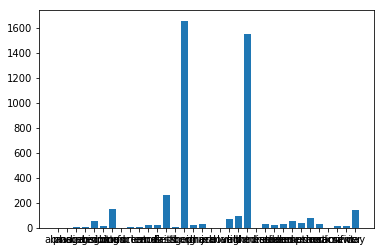

In [12]:
plt.bar(christ_names, christ_counts)

In [11]:
plt.show()

In [56]:
#v_refs = find_valid_refs(Refs,'aaron')
#for ref in v_refs:
#    print(ref.reference)
#print(len(v_refs))
#Ws = []
#for word in unique_words:
#    Ws.append(Word_Count(word))
#for W in Ws:
#    for x in raw_all_words:
#        if W.word == x:
            

In [ ]:
#for x in 